<div class="alert alert-danger" style="text-align:left;"><h1>ASSESSED <span style="float:right;">[100 marks] (25% of COMP1008)</span></h1></div>


# COMP1008 Coursework 2022/23 - Heart Disease Prediction

**Student Name: [Lauryn Williams-Lewis]** 

**Student ID: [20481054]**

<div style="color:red; text-align:center;" ></br>
***Make sure you refer to the Moodle page for submission details, any amendments, and general Q&As related to this coursework!***             
 </div>

## Task Description
Using patient data that is given in the dataset <a href="./data_heart_disease.csv">data_heart_disease.csv</a>, you should build machine learning models to predict whether a patient has heart disease, or not, based on the appropriate input features from the dataset.
The questions have been broken down into three topics to guide you through the coursework. 

1. The first question relates to exploratory analysis and pre-processing of the data.
2. The second question involves building a decision tree model for predicting whether or not someone has heart disease.
3. The third question is about neural networks where you should build an ANN for the same classification exercise.

You should rename this notebook as `COMP1008-cw-202223-[username].ipynb`; for example if your username was `psyabc` then the notebook should be named `COMP1008-cw-202223-psyabc.ipynb`.

### Grading Remarks:

**Use of packages**

The answers to your coursework should be included in this single notebook and should only depend on the given dataset and packages introduced in the computing sessions (`numpy`, `matplotlib`, `pandas`, `scikit-learn`). 
You may use other packages if you think they are necessary, but any packages that automate any process beyond what was used in the computing exercises are prohibited and marks for those questions that use such libraries will receive a mark of 0.

**Answering coding and analysis/comprehension-style questions**

Answers should be given as code in code and/or markdown cells as indicated by each question.
Your answers should clearly follow on from previous code cells and your analysis of any results produced.
Do not delete any code that you rely on to form your answers!

**Dataset Modification(s)**

All modifications to the data in the dataset should be done in code in this notebook. 
We will be running and marking your code based on the original dataset provided to you.

**"Compilation" of Notebook**

Your notebook should run from top to bottom without errors if we try to run it. **WARNING** selecting `Kernel` from the navigation bar and choosing `Restart & Run All` may result in different solutions where randomisation is used so we recommend that you do not do this, but if you do make sure that your answers are still valid.

<div class="alert alert-success" style="text-align:left;"><h2>Question 1. Exploratory Analysis and Pre-processing<span style="float:right;">[40 marks]</span></h2></div>

This question concerns analysing and pre-processing the coursework dataset.

<h3 style="text-alight:left;"> Question 1a. <span style="float:right;">[3 marks]</span> </h3>

Write the code in the code cell beneath ***Q1a. Code*** to import all the relevent packages that are needed for running your code in all parts of question 1, and load the dataset from `data_heart_disease.csv` into a pandas DataFrame named `data`. If you find you need to include another package later on, come back here to import it!

#### Q1a. Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix



data = pd.read_csv("data_heart_disease.csv")

You should now be able to view the dataset by running the code cell below.

In [2]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HRMaxGap,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,8,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,15,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,85,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,64,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,43,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,11,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,48,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,-11,1


<h3 style="text-alight:left;"> Question 1b. <span style="float:right;">[5 marks]</span> </h3>

Write the code in the code cell beneath ***Q1b. Code*** to produce a suitable plot to show which age group in the dataset has the largest sample size.
Here, an age group should be defined every 10 years; for example ages 30-40, 40-50, etc.

Your plot should be clearly labelled and you should write down which age group has the largest sample size (e.g. age group 90-100) in the markdown cell headed ***Q1b. Answer*** below your plot code.

#### Q1b. Code

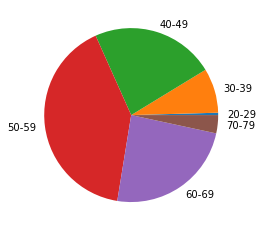

In [3]:
#pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)[source]

#bins - specifies the age group intervals
# intervals are one less than number specified 
bins = [20,30,40,50,60,70,80]

#age group are the labels 
labels = ['20-29','30-39', '40-49', '50-59', '60-69', '70-79' ]

data['AgeGroup'] = pd.cut(data['Age'], bins=bins, right = False , labels=labels, ordered= False)

age = np.array(data.groupby(['AgeGroup'])['Age'].count())

#plt.bar('AgeGroup', 'No.' , data = data['AgeGroup'])
#plt.show()

               

plt.pie(age, labels=labels)
plt.show()

data= data.drop(columns =['AgeGroup'])

#### Q1b. Answer

50-59 is the age group with the largest sample size

<h3 style="text-alight:left;"> Question 1c. <span style="float:right;">[5 marks]</span> </h3>

Using your answer from Q1b, write the code in the code cell beneath ***Q1c. Code*** to report the number of patients in the most populous age group. Write the answer that you obtain in the markdown cell beneath ***Q1c. Answer***.

#### Q1c. Code

In [4]:
#max - finds the biggest age group - then finds the amount of people in the age group
age.max()

374

#### Q1c. Answer

The age group 50-59 has 374 patients in it 

<h3 style="text-alight:left;"> Question 1d. <span style="float:right;">[5 marks]</span> </h3>

How does the prevalence of heart disease compare in the data between the two sexes?

Write the code in the code cell beneath ***Q1d. Code*** to find this data and enter your findings in the markdown cell beneath ***Q1d. Answer***. Your answer should contain some relevent statistic to show how they compare rather than just stating "Sex *** has the highest prevalence of heart disease". 

#### Q1d. Code

In [5]:
# Split the data into male / females

male_data = data[data["Sex"] == "M"]
female_data = data[data["Sex"] == "F"]

# Find number of males and females in the data 

male_total = len(male_data)
female_total = len(female_data)

# make an array of male and females who have heart disease 


male_disease = np.array(male_data.groupby(['HeartDisease'])['HeartDisease'].count())
female_disease = np.array(female_data.groupby(['HeartDisease'])['HeartDisease'].count())

# workout percentage 
m_disease = (((male_disease[1]/male_total) * 100))
f_disease = ((female_disease[1]/female_total) * 100)


print("The percentage of males who have heart disease is",np.round(m_disease, decimals=1), "%")
print("The perecntage of females who gave heart disease is",np.round(f_disease,decimals =1), "%")


The percentage of males who have heart disease is 63.2 %
The perecntage of females who gave heart disease is 25.9 %


#### Q1d. Answer

The percentage of males from the data who have heart disease is 63.2% (1dp) whereas the percentage of women who have heart disease is 25.9% (2sf). The difference in percentage between males and females is 37.3%(1dp). Therefore the data shows men have a higher prevelance of heart disease.

<h3 style="text-alight:left;"> Question 1e. <span style="float:right;">[5 marks]</span> </h3>

Write the code beneath ***Q1e. Code*** to create a suitable plot which illustrates the ranges of each of the numerical features in the dataset. 
You should report which feature has the largest range in the markdown cell beneath ***Q1e. Answer***, stating its range. For example, feature A has the largest range with a range of 50.

#### Q1e. Code

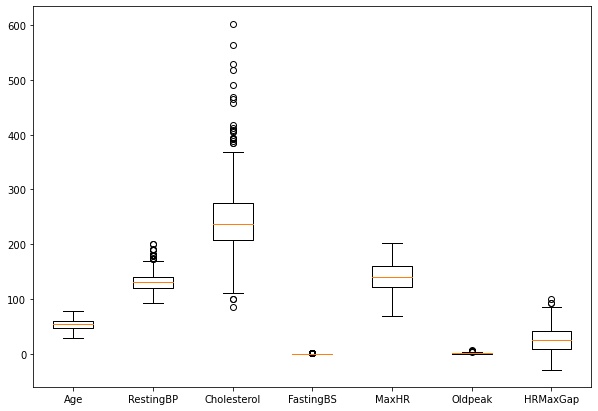

In [6]:
#boxplots for every numerical feature in the 

# Create a list of numerical features
list1 = ['Age','RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HRMaxGap']
# Create a tempoary data set that drops the empty values
data_dropped = data[list1].dropna()
data_dropped
# Convert data to numpy arrays
age1 = np.array(data_dropped['Age'])
restingbp = np.array(data_dropped['RestingBP'])
cholesterol = np.array(data_dropped['Cholesterol'])
fastingbs = np.array(data_dropped['FastingBS'])
maxhr = np.array(data_dropped['MaxHR'])
oldpeak = np.array(data_dropped['Oldpeak'])
hrmaxGap = np.array(data_dropped['HRMaxGap'])
# create a list of data arrays ^

list2= [age1, restingbp, cholesterol, fastingbs, maxhr, oldpeak, hrmaxGap]
 

fig = plt.figure(figsize=(10,7))

# BOX PLOT :)

plt.boxplot(list2, labels=['Age','RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HRMaxGap'])
plt.show()

#### Q1e. Answer

Cholesterol with has the largest range with a range of 518

<h3 style="text-alight:left;"> Question 1f. <span style="float:right;">[6 marks]</span> </h3> 

This question has two parts.

**Part I:** Do any features have missing values? You should use appropriate functions on the dataframe to find this out, and write your code in the cell ***Q1f. Part I Code***. In the markdown cell ***Q1f. Part I Answer***, write down which features (if any) have missing values.

#### Q1f. Part I Code

In [7]:
#isna() -> generates a boolean mask to indicate which cells are missing
#sum -> counts how many missing values there are for each feature 
data.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HRMaxGap            0
HeartDisease        0
dtype: int64

#### Q1f. Part I Answer

Cholesterol has 172 null values 
RestingBP has 1 null value

**Part 2:** Use an appropriate technique to handle any missing values in the data. Your code should be written in the cell ***Q1f. Part II Code***. Write a brief explanation of why you chose this method in the markdown cell ***Q1f. Part II Answer***.

#### Q1f. Part II Code

In [8]:
#dropping the null value from the restingBP column
data = data.dropna(subset=["RestingBP"])



#Calculating the mean value for each gender using the groupby function
median_cholesterol = data.groupby("Sex")["Cholesterol"].median()

for index, row in data.iterrows():
    #Checking if the row has a missing value for the Cholesterol column
    if pd.isna(row["Cholesterol"]):
        #Using at to fill the missing values with the median value from the gender 
        data.at[index, "Cholesterol"] = median_cholesterol[row["Sex"]]
        
  
#Checking whethere the null values have been filled
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HRMaxGap          0
HeartDisease      0
dtype: int64

#### Q1f. Part II Answer

I chose to drop the 1 null value from RestingBp as it will not have a big impact on the data however for Cholesterol I decided to fill the null values with the median cholesterol. I filled the cholesterol with the male median if the patient was male and the female median if the patient was female. I did this as the male and female median for cholesterol is different so the training model will have better data to predict heart disease in amles and females. 
I used the median instead of the mean as the data  is slightly skewed, therfore using the median seemed better suited as it is less likely to be effected by outliers and extreme values.


<h3 style="text-alight:left;"> Question 1g. <span style="float:right;">[6 marks]</span> </h3>

This question has two parts.

**Part I:** Which features in the heart disease data are categorical? You should use appropriate functions on the dataframe to find this out, and write your code in the cell ***Q1g. Part I Code***. In the markdown cell ***Q1g. Part I Answer***, write down which features are categorical.

#### Q1g. Part I Code

In [9]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HRMaxGap            int64
HeartDisease        int64
dtype: object

#### Q1g. Part I Answer

Categorical Features: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope

**Part II:** Use an appropriate technique to transform the categorical features so that they are suitable for training a machine learning model. Your code should be written in the cell ***Q1g. Part II Code***. In the markdown cell ***Q1g. Part II Answer***, give the name of the preprocessing technique you used and briefly explain how this transforms the data.

#### Q1g. Part II Code

In [10]:
data=pd.get_dummies(data)
data


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HRMaxGap,HeartDisease,Sex_F,Sex_M,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,8,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,49,160.0,180.0,0,156,1.0,15,1,1,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98,0.0,85,0,0,1,...,0,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,0,108,1.5,64,1,1,0,...,0,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,0,122,0.0,44,0,0,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,43,1,0,1,...,0,1,0,1,0,1,0,0,1,0
914,68,144.0,193.0,1,141,3.4,11,1,0,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130.0,131.0,0,115,1.2,48,1,0,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130.0,236.0,0,174,0.0,-11,1,1,0,...,0,0,1,0,0,1,0,0,1,0


#### Q1g. Part II Answer

Categorical features need to be transformed into numerical features while retaining their meaning. To do this i used one-hot encoding it gives every categorical feature a binary column fro each possible value. e.g instead of Sex being "M" or "F" there are 2 new columns Sex_M which has a binary value 1 if the patient is male or a 0 if the patient is female. The column Sex is removed as it would just have redudant data.

<h3 style="text-alight:left;"> Question 1h. <span style="float:right;">[5 marks]</span> </h3>

Are there any further preprocessing steps required to prepare the data for building the machine learning models in Questions 2 and 3? For any additional steps you identify, you should:
* Write the code below the ***Q1h. Code*** heading. You can add as many code cells as you need.
* In the ***Q1h. Answer*** markdown cell, write a brief **description** of what you have done and a brief justification of **why** you have done it.

#### Q1h. Code

In [11]:
norm = MinMaxScaler().fit(data)
arr = norm.transform(data) # transform the data using the scaler
data = pd.DataFrame(arr, columns=data.columns) # create a dataframe from the scaled array
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HRMaxGap,HeartDisease,Sex_F,Sex_M,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,...,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,0.520597,0.437841,0.304672,0.233370,0.540771,0.396215,0.425371,0.552890,0.210469,0.789531,...,0.220284,0.050164,0.205016,0.600872,0.194111,0.595420,0.404580,0.068702,0.500545,0.430752
std,0.192605,0.149998,0.103287,0.423206,0.179346,0.121245,0.170541,0.497466,0.407864,0.407864,...,0.414664,0.218401,0.403934,0.489986,0.395731,0.491078,0.491078,0.253085,0.500273,0.495452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.333333,0.249035,0.000000,0.422535,0.295455,0.289855,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530612,0.416667,0.287645,0.000000,0.549296,0.363636,0.420290,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.653061,0.500000,0.351351,0.000000,0.676056,0.465909,0.543478,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Q1h. Answer

fit() - calculates the minimum and maximum values of each feature of the data, 
transform() - applies the scaling transformation onto all the data in the table, 
I then created a new dataframe for the scaled data and then i used describe() - to display the new scaled data in the table




<div class="alert alert-success" style="text-align:left;"><h2>Question 2. Decision Trees<span style="float:right;">[40 marks]</span></h2></div>

This question concerns building and evaluating a decision tree using `sklearn`.

<h3 style="text-alight:left;"> Q2a. <span style="float:right;">[10 marks]</span> </h3>

Build a decision tree in the code cell beneath the heading ***Q2a. Code*** to predict the presence of heart disease in a patient and call it `tree_d`. 
In the markdown cell beneath the heading ***Q2a. Answer***, briefly explain the parameters and values that you chose in the function calls used to build the decision tree, and explain what input features and target output/labels you used in the training.

#### Q2a. Code

In [12]:
hd_data = data


y = hd_data['HeartDisease']
x = hd_data.drop('HeartDisease',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.31, random_state=1)

tree_d = DecisionTreeClassifier(max_depth = 4, random_state=1)
#max _depth -> limits the levels allowed in the tree 
#random_state -> ensure the same result are obtained each time the code is run
tree_d.fit(x_train,y_train)
tree_d

DecisionTreeClassifier(max_depth=4, random_state=1)


## Q2a. Answer

I chose the random_state to be 1 to ensure the same results are obtained each time the code is run and the max_depth is set to 4 as it gives the highest accuracy for the decision tree. The test set is set to 31% so majority of the data can be used to train the decision tree.

<h3 style="text-alight:left;"> Q2b. <span style="float:right;">[5 marks]</span> </h3>

Write some code in the code cell beneath the heading ***Q2b. Code*** to evaluate the decision tree model that you built. Your code should `print` out the accuracy of the model for correctly classifying whether patients have or do not have heart disease. 

#### Q2b. Code

In [13]:
y_predict = tree_d.predict(x_test) 
# use our trained tree to predict labels for the test data

print('Testing accuracy: \t', metrics.accuracy_score(y_test, y_predict)) 
# calculate the accuracy by comparing the true labels (y_test) to the predicted labels (y_predict)

Testing accuracy: 	 0.8526315789473684


<h3 style="text-alight:left;"> Q2c. <span style="float:right;">[5 marks]</span> </h3>

Using a confusion matrix, analyse and report the accuracy of the decision tree that you trained. 
You should write your code in the code cell beneath the heading ***Q2c. Code***, and use the markdown cell beneath the heading ***Q2c. Answer*** to report, with reference to your confusion matrix, which class your decision tree model is better at classifying.

#### Q2c. Code

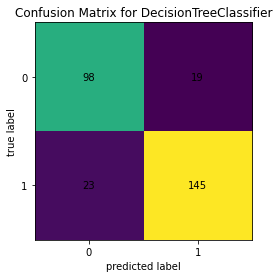

In [14]:
cm = confusion_matrix(y_test, y_predict)

# Print the confusion matrix
#print("Confusion Matrix:\n", cm)

# Calculate the accuracy of the model
#accuracy = (cm[0][0] + cm[1][1]) / sum(sum(cm))
#print("Accuracy:", accuracy)


#
def cf_matrix(mat, t_name, model_name):
    
    fig, ax = plt.subplots()
    im = ax.imshow(mat)
    
    ax.set_xticks(range(0,len(t_name)))
    ax.set_yticks(range(0,len(t_name)))
    ax.set_xticklabels(t_name)
    ax.set_yticklabels(t_name)

    for i in range(0,len(t_name)):
        for j in range(0,len(t_name)):
            text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k")
    
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    plt.title(f"Confusion Matrix for {model_name}")
    
cf_matrix(cm,[0,1],'DecisionTreeClassifier')

#### Q2c. Answer

The Confusion Matrix tells us that only 19 of the people who do not have heart disease are misclassified whereas 98 are predicted correctly. It also tells us that out of the people who do have heart disease 145 were predicted correctly whereas 23 were misclassified. This shows that the DecisionTreeClassifier is good at classifying who does and doesnt have heart disease.

<h3 style="text-alight:left;"> Q2d. <span style="float:right;">[10 marks]</span> </h3>

Write the code in the code cell beneath the heading ***Q2d. Code*** to draw your trained decision tree.

***There are two parts of this question for the analysis:***

In part I, use your plot to analyse your trained decision tree and comment in the markdown cell beneath the heading ***Q2d. Part I Answer*** on what the three most important features are that are used to predict the presence of heart disease.

In part II, extract a list of rule(s) from your decision tree plot that can be used to classify people with or without heart disease, and write these into the markdown cell beneath the heading ***Q2d. Part II Answer***.

#### Q2d. Code

[Text(0.5267857142857143, 0.9, 'ST_Slope_Up <= 0.5\ngini = 0.497\nsamples = 632\nvalue = [293, 339]\nclass = HD'),
 Text(0.2857142857142857, 0.7, 'MaxHR <= 0.637\ngini = 0.319\nsamples = 352\nvalue = [70, 282]\nclass = HD'),
 Text(0.14285714285714285, 0.5, 'Sex_M <= 0.5\ngini = 0.231\nsamples = 292\nvalue = [39, 253]\nclass = HD'),
 Text(0.07142857142857142, 0.3, 'RestingBP <= 0.425\ngini = 0.488\nsamples = 38\nvalue = [16, 22]\nclass = HD'),
 Text(0.03571428571428571, 0.1, 'gini = 0.457\nsamples = 17\nvalue = [11, 6]\nclass = No HD'),
 Text(0.10714285714285714, 0.1, 'gini = 0.363\nsamples = 21\nvalue = [5, 16]\nclass = HD'),
 Text(0.21428571428571427, 0.3, 'ChestPainType_ASY <= 0.5\ngini = 0.165\nsamples = 254\nvalue = [23, 231]\nclass = HD'),
 Text(0.17857142857142858, 0.1, 'gini = 0.299\nsamples = 60\nvalue = [11, 49]\nclass = HD'),
 Text(0.25, 0.1, 'gini = 0.116\nsamples = 194\nvalue = [12, 182]\nclass = HD'),
 Text(0.42857142857142855, 0.5, 'ChestPainType_ASY <= 0.5\ngini = 0.499\

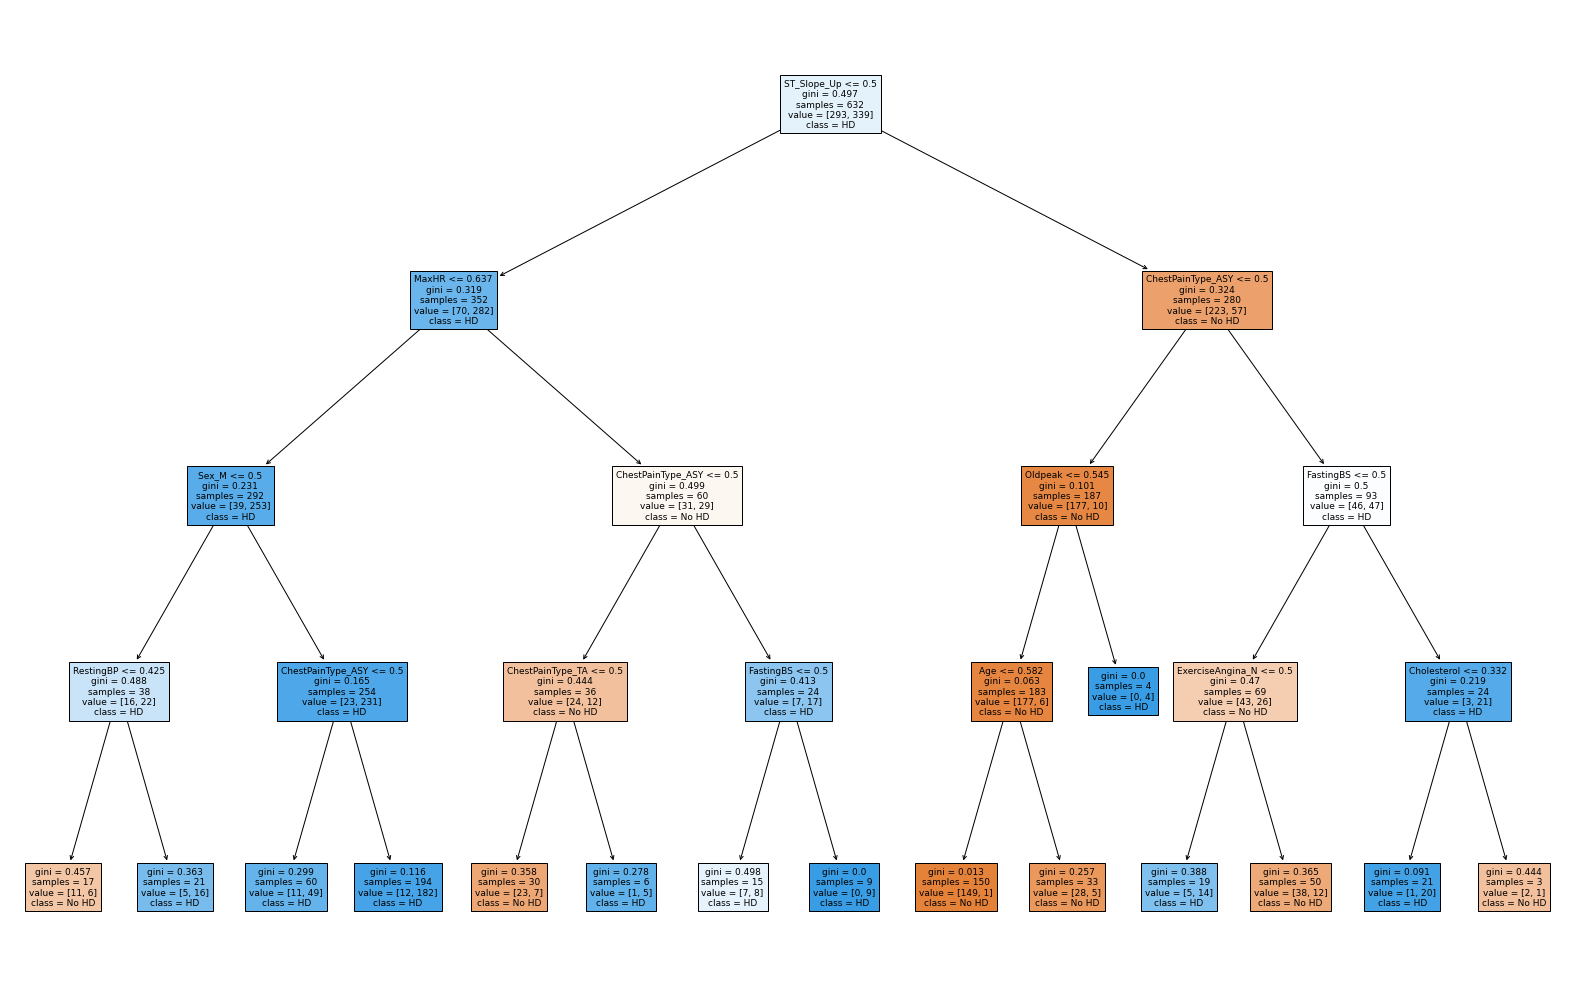

In [15]:
hd_features = list(x_train.columns)
hd_class = ['No HD','HD'] # Not Cancelled = 0, Cancelled = 1

plt.figure(figsize=(28,18)) # You may need to adjust this value to get the tree to fit on your screen
plot_tree(tree_d, feature_names = hd_features,class_names=hd_class, filled=True, fontsize=9)

#### Q2d. Part I Answer

The three most imprtant features or heart disease are ST_Slope_Up, Max_HR, ChestPainType_ASY

#### Q2d. Part II Answer

Rules for a patient that has heart disease 

If a patient has:

- ST_Slope_UP that is <=0.5

- MaxHR that is <= 0.637

- Sex_M <= 0.5

- ChestPainType_ASY <=0.5

Then they do have heart disease 




Rules for a patient that doesn't have heart disease 

If a patient has:

- ST_Slope_UP that is <=0.5

- ChestPainType_ASY <= 0.5

- OldPeak <= 0.565

- Age <=0.582

Then they don't have heart disease




<h3 style="text-alight:left;"> Q2e. <span style="float:right;">[10 marks]</span> </h3>

Write the code in the code cell beneath the heading ***Q2e. Code*** which enables you to test and evaluate the performance of decision tree models used for classifying people with or without heart disease. You should use this code to perform an experiment to find the best depth of a decision tree classification model. You should then explain your chosen best decision tree model in the markdown cell beneath the heading ***Q2e. Answer*** with respect to: its accuracy, over-fitting, features, true positives, and true negatives.

#### Q2e. Code

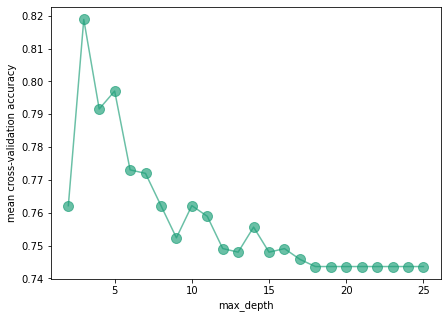

In [16]:
cv_scores = list()
depth_values = range(2,26)

for d in depth_values:
    tree_d_k = DecisionTreeClassifier(max_depth = d,random_state=1)
    score = cross_val_score(tree_d_k, x, y, cv=3, scoring='accuracy')
    # note: the whole datasets are passed to cross_val_score, not the previously partitioned training / testing data

    mean_score = score.mean()
    cv_scores.append(mean_score)
    
    
plt.figure(figsize=(7,5))
plt.plot(depth_values, cv_scores, '-o',markersize=10,alpha=0.65,color='#1b9e77')
plt.xlabel('max_depth')
plt.ylabel('mean cross-validation accuracy')
plt.show()

#### Q2e. Answer

From this graph we can see that the max_depth that gives the best mean accuracies occur at 3 or 4. Adding more levels to the tree introduces more complexity without increasing the accuracy of the decision tree. The more levels there are to the tree the higher the chance the training data will be overlifted which will decrease the accuracy as the number of levels of the tree grows.

<div class="alert alert-success" style="text-align:left;"><h2>Question 3. Neural Networks<span style="float:right;">[20 marks]</span></h2></div>


This question concerns building and evaluating a neural network using `sklearn`, comparing and contrasting it with your Decision Tree method.

<h3 style="text-alight:left;"> Q3a. <span style="float:right;">[5 marks]</span> </h3>

Write the code in the code cell beneath the heading ***Q3a. Code*** to build a neural network to predict the presence of heart disease in a patient. 
Briefly explain the parameters and values that you chose in the functions used in the markdown cell beneath the heading ***Q3a Answer***.

#### Q3a. Code

In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(4,3), max_iter=1000,random_state=1) # The MLP implementation uses some randomness too!
mlp.fit(x_train, y_train) 




MLPClassifier(hidden_layer_sizes=(4, 3), max_iter=1000, random_state=1)

#### Q3a. Answer

The hidden_layer_sizes parameter takes a tuple defining the number in each hidden layer. I have set it to (4,3) which gives the neural network 2 hidden layers, where the first layer has 4 neurons and the second layer has 3 neurons.

I have also set max_iter to 1000 meaning that the training will terminate after 1000 epochs unless it has already converged. If it has converged there has been no improvement for a certain number of iterations

<h3 style="text-alight:left;"> Q3b. <span style="float:right;">[5 marks]</span> </h3>

Write the code in the code cell beneath the heading ***Q3b. Code*** to evaluate the neural network model that you built. Your code should output relevant statistics to show which of the decision tree and neural network models is better in terms of overall accuracy.

#### Q3b. Code

In [18]:
y_predict = mlp.predict(x_test) 
# use our trained network to predict labels for the test data
y_predict_train = mlp.predict(x_train)

y_predict_dt = tree_d.predict(x_test)

print('Neural Network Testing accuracy: \t', metrics.accuracy_score(y_test, y_predict))

print('Neural Network Training accuracy: \t', metrics.accuracy_score(y_train, y_predict_train)) 

print('Decision tree Testing accuracy: \t', metrics.accuracy_score(y_test, y_predict_dt)) 
# calculate the accuracy by comparing the true labels (y_test) to the predicted labels (y_predict)

Neural Network Testing accuracy: 	 0.856140350877193
Neural Network Training accuracy: 	 0.8813291139240507
Decision tree Testing accuracy: 	 0.8526315789473684


<h3 style="text-alight:left;"> Q3c. <span style="float:right;">[5 marks]</span> </h3>

Compared to the decision tree model that you built, is your neural network model better at classifying people with heart disease, or better at classifying people without heart disease? 

You should write any code used for your evaluation in the code cell beneath the heading ***Q3c. Code*** and write into the markdown cell beneath ***Q3c. Answer*** to explain the reasons behind your answer. You should use a confusion matrix to support your answers.

#### Q3c. Code

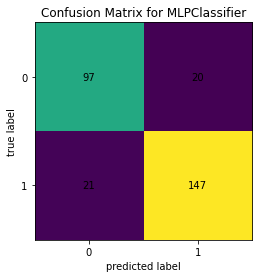

In [19]:
cm_mlp = metrics.confusion_matrix(y_test,y_predict) # calculate confusion matrix for the neural network
cf_matrix(cm_mlp,[0,1],'MLPClassifier') # plot the confusion matrix

#### Q3c. Answer

The Confusion Matrix tells us that only 20 of the people who do not have heart disease are misclassified whereas 97 are predicted correctly. It also tells us that out of the people who do have heart disease 147 were predicted correctly whereas 21 were misclassified. This shows that the DecisionTreeClassifier is good a predicting who does and doesnt have heart disease. 

This shows that the neural network is better at classifying people who do have heart disease compared to the decision tree however the decision tree was better at classifying peple who do not have heart disease 

<h3 style="text-alight:left;"> Q3d. <span style="float:right;">[5 marks]</span> </h3>

How would you suggest improving the accuracy of predicting the presence of heart disease in new patients? Briefly explain in the markdown cell beneath the heading ***Q3d. Answer*** any potential strategies you could use to improve the model's performance on unseen data. Your answer should make particular reference to any shortcomings of the training dataset used for this coursework.

#### Q3d. Answer

- Collect more data: as this would increase the sample size used to train the model therefore would create more accurate preidtions of heart disease 

- Feature Engineering: Not all features may be relevant in predicting heart disease. Feature ranking can help the accuracy of the model by ranking the most important features. Also adding new features that can capture a better relationship between the input variables and the target variable. e.g combining age and cholesterol levels may cause the model to produce more accurate results

- Decision tree parameters: The parameters used for the decison tree can be altered to improve the accuracy of the tree. Grid/Random search can be used to see what combination of parameters produces the best result 

